**Example on how to apply convolutions using FFT**

Import needed libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Download and load data.

Here `e` is the energy and `d` the electronic density of states (DOS) for C in the diamond structure.

In [6]:
!wget https://raw.githubusercontent.com/anbergman/expmetII/main/Data/FFT/diamond.dos
dos=np.genfromtxt('diamond.dos')
e=dos[:,0]
d=dos[:,1]

--2022-08-28 20:42:54--  https://raw.githubusercontent.com/anbergman/expmetII/main/Data/FFT/diamond.dos
Slår upp raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Ansluter till raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443 … ansluten.
HTTP-begäran skickad, väntar på svar... 200 OK
Längd: 10836 (11K) [text/plain]
Sparar till: ”diamond.dos.1”

diamond.dos.1       100%[===================>]  10,58K  --.-KB/s    om 0s      

2022-08-28 20:42:54 (37,6 MB/s) - ”diamond.dos.1” sparades [10836/10836]



Plot the DOS data

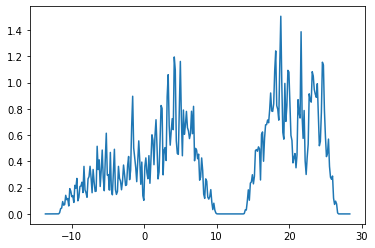

In [57]:
plt.figure()
plt.plot(e,d)
plt.show()

Create a kernel for the convolution

Here a Gaussian with a width controlled by the parameter sigma. 
Larger sigma: broader Gaussian.

In [85]:
sigma=0.1
xlim=np.round(4.0*sigma+0.5)
x=np.linspace(-xlim,xlim,100)
k=1/(sigma*np.sqrt(2.0*np.pi))*np.exp(-0.5*(x/sigma)**2)

Plot the kernel

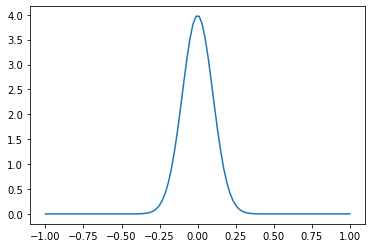

In [86]:
plt.figure()
plt.plot(x,k)
plt.show()

Convolute the data with the kernel by means of Fourier transforms.

Here we pad the resulting Fourier transforms to the combined length of the data and the kernel (c.f. circular vs linear convolution)

In [87]:
l=d.shape[0]+k.shape[0]
K=np.fft.fft(k,n=l)
D=np.fft.fft(d,n=l)
DK=D*K
dk=np.abs(np.fft.ifft(DK))

Trim and scale the convoluted and padded data to the original length of the data.

In [93]:
x_trim=np.int32(k.shape[0]/2.0)
dk_trim=dk[x_trim:-1-x_trim+1]/x_trim

Plot the original and convoluted data

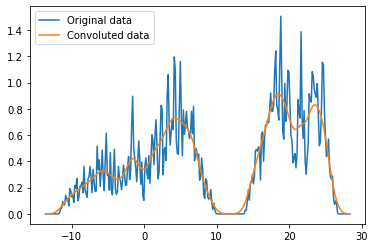

In [92]:
plt.figure()
plt.plot(e,d,label='Original data')
plt.plot(e,dk_trim, label='Convoluted data')
plt.legend()
plt.show()